In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [7]:
df_housing = pd.read_csv('C:/Users/User/Desktop/Housing.csv')

In [51]:
df_housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [52]:
df_housing.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

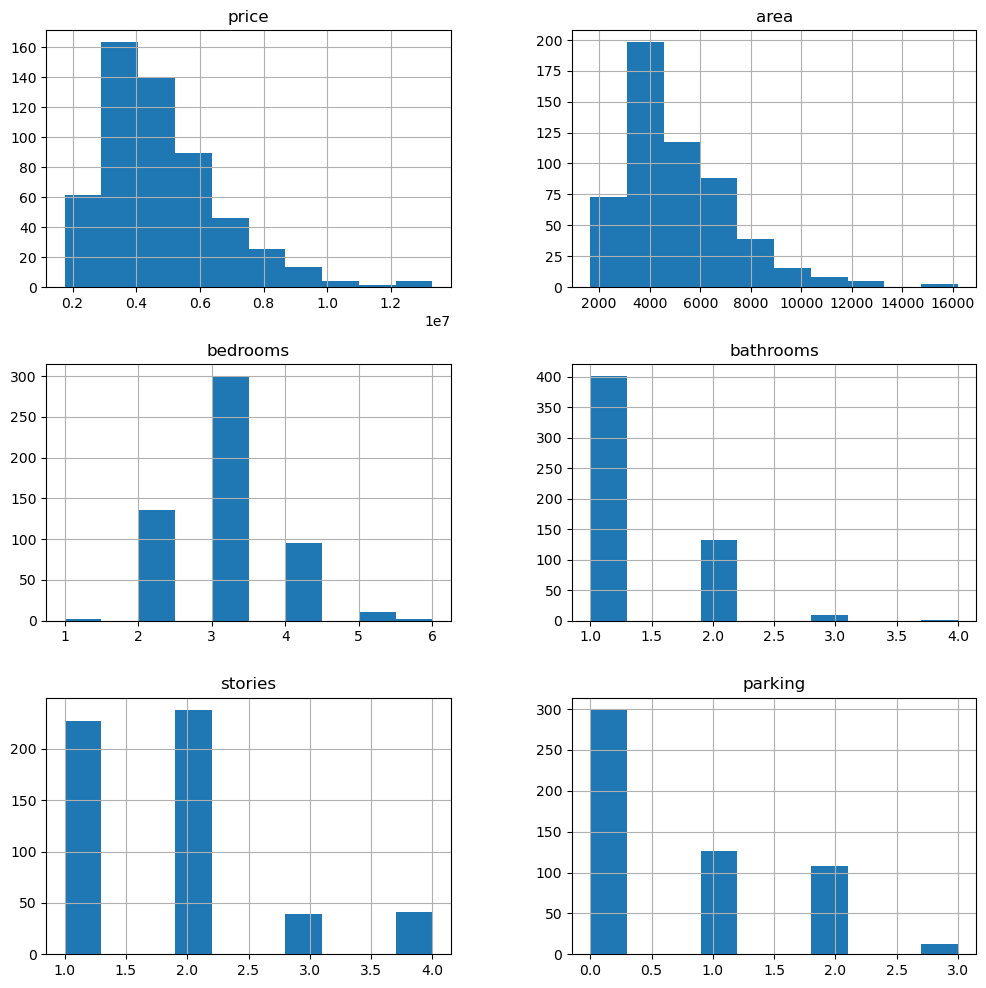

In [53]:
plt.rcParams['figure.figsize'] = [12, 12]
df_housing.hist()

In [54]:
df_housing.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [55]:
# Поиск дупликатов
full_duplicates = df_housing.duplicated().sum()
print(f"Полных дубликатов (все поля одинаковые): {full_duplicates}")

Полных дубликатов (все поля одинаковые): 0


In [56]:
#Подсчёт частоты уникальности встречаемости каждого уникального значения (или «цепочек» событий)
df_housing[['bedrooms', 'bathrooms', 'stories', 'mainroad']].value_counts()

bedrooms  bathrooms  stories  mainroad
2         1          1        yes         91
3         1          2        yes         90
                     1        yes         72
4         1          2        yes         28
3         2          2        yes         25
4         2          2        yes         25
3         1          2        no          21
                     3        yes         20
2         1          2        yes         19
                     1        no          18
3         2          4        yes         17
                     1        yes         15
          1          1        no          13
          2          3        yes         11
4         2          4        yes          9
3         1          4        yes          8
4         2          1        yes          6
                     2        no           5
          1          4        yes          4
                     2        no           4
2         2          1        yes          4
3         2     

In [ ]:
df_housing['mainroad'] = df_housing['mainroad'].map({'yes': 1, 'no': 0}).astype(int)
df_housing['guestroom'] = df_housing['guestroom'].map({'yes': 1, 'no': 0}).astype(int)
df_housing['basement'] = df_housing['basement'].map({'yes': 1, 'no': 0}).astype(int)
df_housing['hotwaterheating'] = df_housing['hotwaterheating'].map({'yes': 1, 'no': 0}).astype(int)
df_housing['airconditioning'] = df_housing['airconditioning'].map({'yes': 1, 'no': 0}).astype(int)
df_housing['prefarea'] = df_housing['prefarea'].map({'yes': 1, 'no': 0}).astype(int)
df_housing['furnishingstatus'] = df_housing['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}).astype(int)


In [27]:
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [24]:
print(df_housing['mainroad'].unique())


[1 0]


In [21]:
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


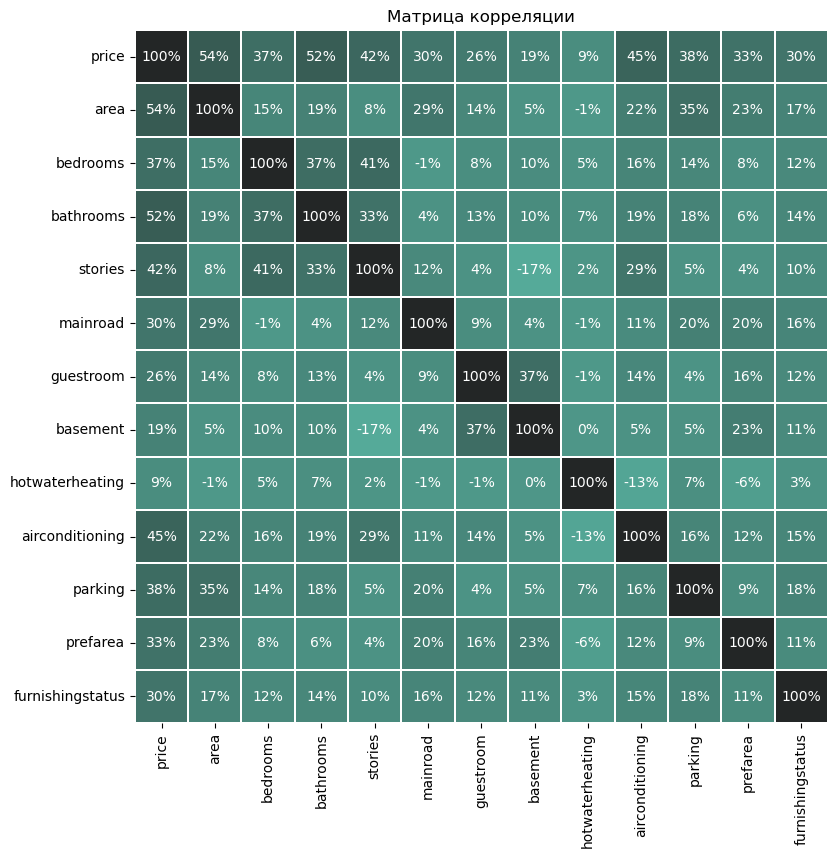

In [62]:
plt.figure(figsize = (9,9))
sns.heatmap(df_housing.corr(),
            xticklabels = df_housing.corr().columns,
            yticklabels = df_housing.corr().columns,
            annot = True,
            fmt = '.0%',
            square = True,
            linewidth = 0.1,
            cmap = sns.color_palette("dark:#5A9_r", as_cmap=True),
            cbar = False
)
plt.title('Матрица корреляции')
plt.show()

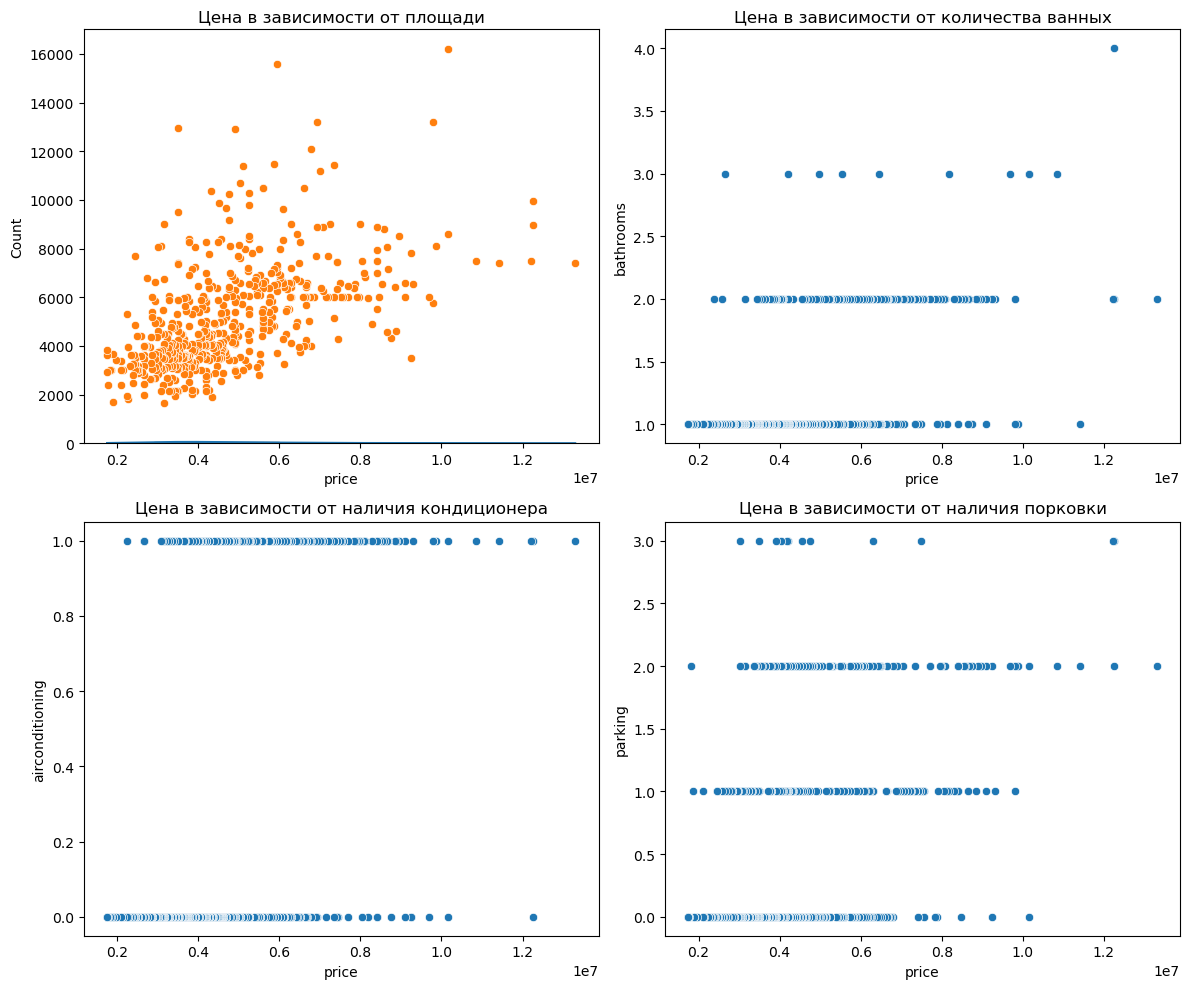

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=df_housing, x="price", kde=True, ax=axes[0,0], bins=30) 
axes[0,0].set_title("Цена в зависимости от площади")
sns.scatterplot(data=df_housing, x="price", y="area", ax=axes[0,0])
axes[0,1].set_title("Цена в зависимости от количества ванных")
sns.scatterplot(data=df_housing, x="price", y="bathrooms", ax=axes[0,1])
axes[1,0].set_title("Цена в зависимости от наличия кондиционера")
sns.scatterplot(data=df_housing, x="price", y="airconditioning", ax=axes[1,0])
axes[1,1].set_title("Цена в зависимости от наличия порковки")
sns.scatterplot(data=df_housing, x="price", y="parking", ax=axes[1,1])
plt.tight_layout()
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
# Разделяем данные
x = df_housing.drop(columns = ["price"])
y = df_housing['price']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 32)

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

rf = RandomForestRegressor(
    n_estimators = 100, # Количество деревьев в "лесу". 100 — стандартное значение.
    random_state = 32,  # Фиксация генератора случайных чисел для воспроизводимости результата.
    n_jobs=-1           # Параметр распараллеливания: -1 означает использование всех ядер процессора.
)

rf.fit(x, y)
rf_predict = rf.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [53]:
mse = mean_squared_error(y_test, rf_predict)
mae = mean_absolute_error(y_test, rf_predict)
print(mse, mae)


126835053677.90704 256931.70030581043


In [54]:
mse = mean_squared_error(y_test, rf_predict)
mse_norm_var = mse / np.var(y_test)
print("Normalized MSE (variance):", mse_norm_var)
mae_normalized = mae / np.mean(y_test)  
print("Normalized MAE:", mae_normalized)

Normalized MSE (variance): 0.03731448188909957
Normalized MAE: 0.053529483797800634


In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeRegressor(
    random_state=32,
    max_depth = 3, 
    min_samples_leaf = 20)
scoring = { 'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error'}
# Поиск оптимальных параметров
grid_search = GridSearchCV(
    estimator=tree_model,
    cv=5,
    param_grid={'max_depth':[3], 'min_samples_leaf':[20]},
    scoring = scoring,
    refit='MAE',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_
grid_search_predict = grid_search.predict(X_test)


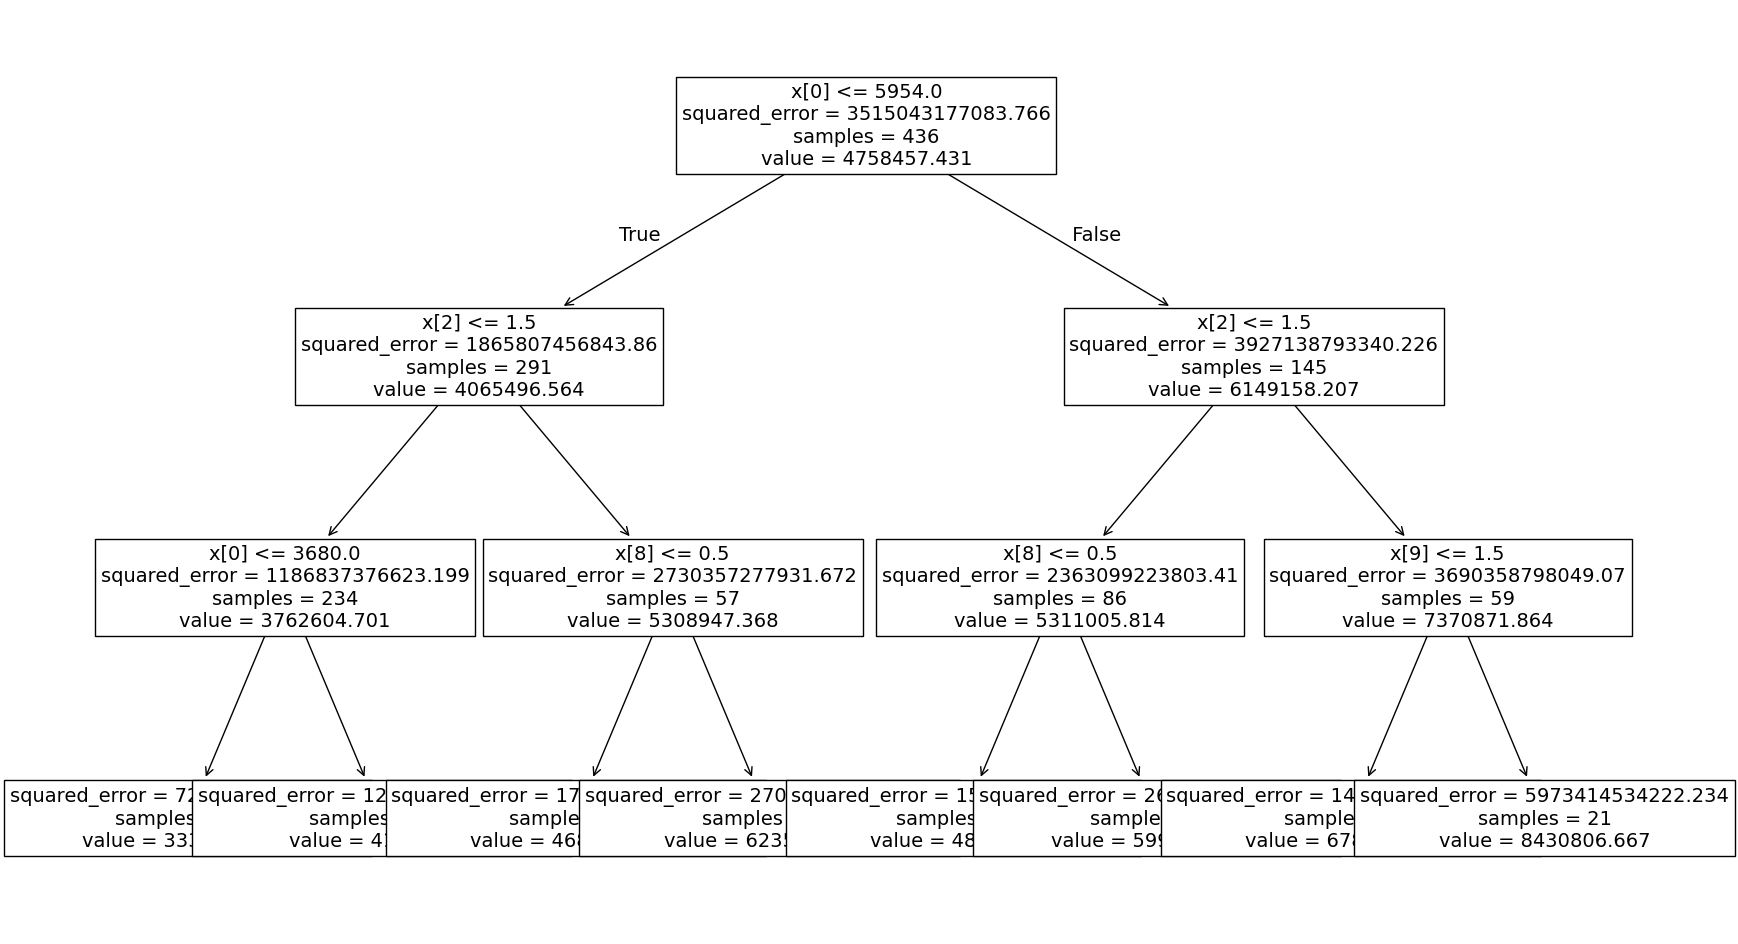

In [59]:
from sklearn import tree
plt.figure(figsize=(20, 12))
tree.plot_tree(tree_model.fit(X_train, y_train), fontsize=14)
plt.show()


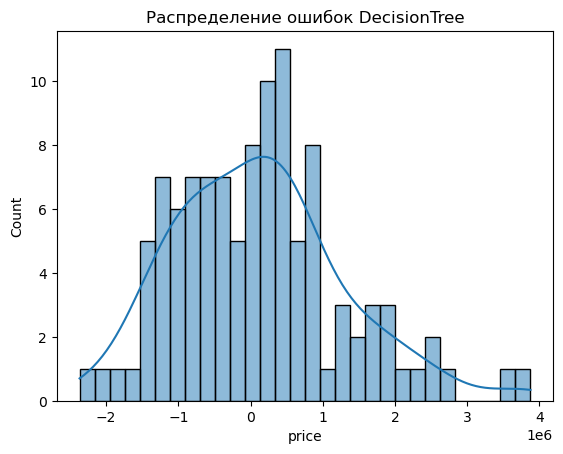

In [60]:
errors = y_test - grid_search_predict
sns.histplot(errors, bins=30, kde=True)
plt.title("Распределение ошибок DecisionTree")
plt.show()


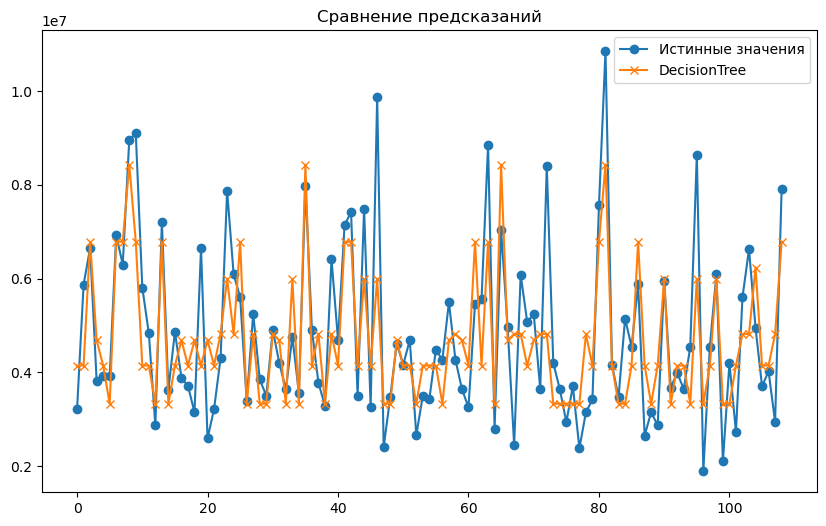

In [61]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Истинные значения", marker='o')
plt.plot(grid_search_predict, label="DecisionTree", marker='x')
plt.legend()
plt.title("Сравнение предсказаний")
plt.show()

In [103]:
from tensorflow.keras import layers
model = keras.Sequential([
    keras.Input(shape=(12,)),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1, activation = 'linear')
])

model.compile(optimizer = 'adam', 
              loss = 'mse',
              metrics = ['mae']) 

process = model.fit( X_train, y_train,
            validation_split = 0.2,
            epochs = 100,
            batch_size = 32, 
            verbose = 0 ) 
test_loss, test_mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test).flatten() # превращает многомерный массив в одномерный

nmse = mse / np.var(y_test)
nrmse = np.sqrt(mse) / (y_test.max() - y_test.min())
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("NMSE:", nmse, "NRMSE:", nrmse, "MAPE:", mape)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4641644347392.0000 - mae: 1805630.8750 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
NMSE: 0.03731448188909957 NRMSE: 0.03974766664749064 MAPE: 36.08021253441036


In [108]:
from xgboost import XGBRegressor
model = XGBRegressor(
    objective = 'reg:squarederror',  
    learning_rate = 0.1,  
    max_depth = 3,  
    n_estimators = 100,  
    colsample_bytree = 0.8,  
    subsample = 0.8,  
    eval_metric = ['mae', 'rmse'], 
    random_state = 32
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 724884.625


In [107]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(
    boosting_type = 'gbdt',
    objective = 'regression',  
    num_leaves = 20,
    learning_rate = 0.1,  
    max_depth = 3,  
    n_estimators = 100,  
    bagging_fraction = 0.8, 
    random_state = 32, 
    verbose = -1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae) 

MAE: 719394.5979509439


In [106]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(
    iterations = 100, 
    learning_rate = 0.1,
    depth = 3,
    verbose = 0
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae) 


MAE: 710768.3713615346


In [100]:
def metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    nmse = mse / np.var(y_test)
    nrmse = np.sqrt(mse) / (y_test.max() - y_test.min())
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    return {
        "NMSE": nmse,
        "NRMSE": nrmse,
        "MAPE": mape
    }


In [101]:
models = {
    "DecisionTree": DecisionTreeRegressor(random_state=32),
    "RandomForest": RandomForestRegressor(random_state=32),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=32, verbosity=0),
    "LightGBM": LGBMRegressor(objective="regression", random_state=32, verbose=-1),
    "CatBoost": CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, random_state=32, verbose=0)                                                                                                                                                                                                                                                                                               
}

results = {}
for name, model in models.items():
    results[name] = metrics(model, X_train, y_train, X_test, y_test)
    
df_results = pd.DataFrame(results).T #создание объекта из словаря
print(df_results)


                  NMSE     NRMSE       MAPE
DecisionTree  0.037314  0.039748  19.923308
RandomForest  0.037314  0.039748  15.591079
XGBoost       0.037314  0.039748  16.562616
LightGBM      0.037314  0.039748  16.274585
CatBoost      0.037314  0.039748  15.997967


In [105]:
print('Keras - NMSE: 0.03731448188909957 NRMSE: 0.03974766664749064 MAPE: 36.08021253441036') 

Keras - NMSE: 0.03731448188909957 NRMSE: 0.03974766664749064 MAPE: 36.08021253441036
